<h1>This program detects if a person has diabetes</h1>

Dataset Link:
<a href='https://www.kaggle.com/uciml/pima-indians-diabetes-database'>Dataset</a>


In [0]:
#Load Modules
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

plt.style.use('fivethirtyeight')

In [1]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [0]:
df = pd.read_csv('diabetes.csv')

In [6]:
df.shape

(768, 9)

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
#Check for and remove duplicates
df.drop_duplicates(inplace=True)

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
#Convert data into array
dataset = df.values
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [0]:
#independent or feature dataset
X = dataset[:,0:8]

#target or dependent dataset
y = dataset[:,8]

In [13]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [12]:
y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

In [16]:
#Process the data
min_max_scaler = MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

X_scale

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [0]:
#SPlit data into 80% training and 20% testing
#random_state prevents different results
X_train,X_test,y_train,y_test = train_test_split(X_scale,y,test_size=0.2,random_state=4)

<h1>Build the Model</h1>

In [0]:
#3 layer model
model = Sequential([
                    Dense(12,activation='relu',input_shape=(8,)), #12 neurons
                    Dense(15,activation='relu'), #15 neurons
                    Dense(1,activation='sigmoid') #1 neuron
                    ])

In [22]:
#Compile the model
model.compile(
    optimizer = 'sgd',
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [24]:
#Train the model

hist = model.fit(X_train,y_train,batch_size=57,epochs=1000,validation_split=0.2)

Train on 491 samples, validate on 123 samples
Epoch 1/1000
491/491 [==============================] - 0s 42us/step - loss: 0.4543 - acc: 0.7821 - val_loss: 0.5313 - val_acc: 0.7724
Epoch 2/1000
491/491 [==============================] - 0s 35us/step - loss: 0.4534 - acc: 0.7780 - val_loss: 0.5315 - val_acc: 0.7642
Epoch 3/1000
491/491 [==============================] - 0s 36us/step - loss: 0.4534 - acc: 0.7841 - val_loss: 0.5311 - val_acc: 0.7561
Epoch 4/1000
491/491 [==============================] - 0s 38us/step - loss: 0.4532 - acc: 0.7780 - val_loss: 0.5311 - val_acc: 0.7642
Epoch 5/1000
491/491 [==============================] - 0s 34us/step - loss: 0.4535 - acc: 0.7780 - val_loss: 0.5314 - val_acc: 0.7724
Epoch 6/1000
491/491 [==============================] - 0s 37us/step - loss: 0.4529 - acc: 0.7841 - val_loss: 0.5312 - val_acc: 0.7642
Epoch 7/1000
491/491 [==============================] - 0s 35us/step - loss: 0.4530 - acc: 0.7821 - val_loss: 0.5311 - val_acc: 0.7561
Epoch 8/1

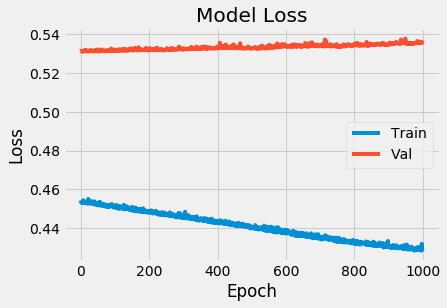

In [26]:
#Visualize the training loss and the validation loss to see if model is overfitting
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Val'],loc='best')
plt.show()

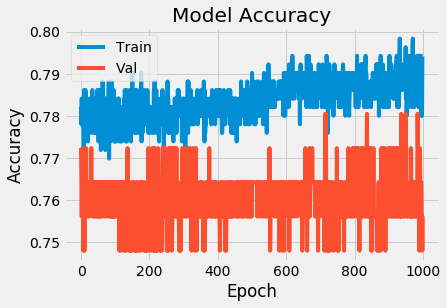

In [28]:
#Visualize the training accuracy and the validation accuracy to see if model is overfitting
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Val'],loc='best')
plt.show()

In [32]:
#Make a prediction 
prediction = model.predict(X_test)
prediction = [1 if y>=0.5 else 0 for y in prediction]
prediction

#Actual values
print(y_test)

[0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 1. 1.]


In [40]:
#Evaluate model on training data

prediction = model.predict(X_train)

prediction = [1 if y>= 0.5 else 0 for y in prediction]

print(classification_report(y_train,prediction))

print('Confusion Matrix:')
print(confusion_matrix(y_train,prediction))

print('\n')

print('Accuracy Score:')
print(accuracy_score(y_train,prediction))

              precision    recall  f1-score   support

         0.0       0.79      0.89      0.84       398
         1.0       0.75      0.57      0.65       216

    accuracy                           0.78       614
   macro avg       0.77      0.73      0.74       614
weighted avg       0.78      0.78      0.77       614

Confusion Matrix:
[[356  42]
 [ 93 123]]


Accuracy Score:
0.7801302931596091


In [41]:
#Evaluate model on testing data

prediction = model.predict(X_test)

prediction = [1 if y>= 0.5 else 0 for y in prediction]

print(classification_report(y_test,prediction))

print('Confusion Matrix:')
print(confusion_matrix(y_test,prediction))

print('\n')

print('Accuracy Score:')
print(accuracy_score(y_test,prediction))

              precision    recall  f1-score   support

         0.0       0.81      0.82      0.82       102
         1.0       0.64      0.62      0.63        52

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154

Confusion Matrix:
[[84 18]
 [20 32]]


Accuracy Score:
0.7532467532467533
